<a href="https://colab.research.google.com/github/JF11579/Adelphi/blob/main/Spring5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This one uses just 5 features

# Steps


1.   Subest Data
2.   Run Lasso on the Orig Data 
      Change split 3 times and change Alpha 3 x
3.  Now try adjusted data
      plug in Avg April sales
4.  Lastly use augmented data.



# Libraries

In [224]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from matplotlib import pyplot
import seaborn as sns
import pandas
from sklearn.model_selection import train_test_split #Split data in testing and training

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn import metrics
import urllib

import datetime as dt
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


# evaluate an lasso regression model on the dataset
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import arange

from yellowbrick.features import ParallelCoordinates
# use automatically configured the lasso regression algorithm
from sklearn.linear_model import LassoCV
import plotly.express as px
from sklearn import metrics
import urllib
from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression

# Juans code and Metrics

Create Prediction Plots

In [225]:
def Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test):
    fig, ax = plt.subplots(ncols=2, figsize=(10,4))

    ax[0].scatter(y_train, y_pred_Train)
    ax[0].set_ylim(0,3)
    ax[0].set_xlim(0,3)
    ax[0].grid()
    ax[0].set_xlabel('y')
    ax[0].set_ylabel('yhat')
    ax[0].set_title('Training Set')


    ax[1].scatter(y_test, y_pred_Test)
    ax[1].set_ylim(0,3)
    ax[1].set_xlim(0,3)
    ax[1].grid()
    ax[1].set_xlabel('y')
    ax[1].set_ylabel('yhat')
    ax[1].set_title('Testing Set')
    plt.show()
    return()

Print Metrics

In [226]:
def Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test):
    print('Training Metrics:')
    print('R squared:', metrics.r2_score(y_train, y_pred_Train))
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_Train))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_Train))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_Train)))

    print('\nTesting Metrics:')
    print('R squared:', metrics.r2_score(y_test, y_pred_Test))
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_Test))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_Test))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_Test)))
    
    return()

Plot Box Plots

In [227]:
def Multiple_Runner(model, X, y):
    
    Train_MSE = [] #Empty list to Store MSEs for training data set
    Test_MSE = []  #Empty list to Store MSEs for testing data set

    Train_R2 = [] #Empty list to Store R2s for training data set
    Test_R2 = []  #Empty list to Store R2s for testing data set

    for i in range(1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
        model.fit(X_train, y_train) #Train the model
    
        y_pred_Train  = model.predict(X_train)  #Predictions on training model
        y_pred_Test   = model.predict(X_test)   #Predictions on testing model
    
        train_R2 = metrics.r2_score(y_train, y_pred_Train) #Obtaining the metrics
        test_R2  = metrics.r2_score(y_test, y_pred_Test)
    
        train_MSE = metrics.mean_squared_error(y_train, y_pred_Train)
        test_MSE  = metrics.mean_squared_error(y_test, y_pred_Test)
    
        Train_MSE.append(train_MSE) #Storing the metrics in the lists
        Test_MSE.append(test_MSE) 
    
        Train_R2.append(train_R2) #Storing the metrics in the lists
        Test_R2.append(test_R2)  
    
    print('Train MSE median:', np.median(Train_MSE))
    print('Test MSE median:', np.median(Test_MSE))

    print('\nTrain_R2 median:', np.median(Train_R2))
    print('Test_R2 median:', np.median(Test_R2))

    fig, ax = plt.subplots(ncols=2, figsize=(10,4))

    ax[0].boxplot([Train_MSE, Test_MSE])
    ax[0].set_xticks([1,2],minor = False)                   #setting boxplot names
    ax[0].set_xticklabels(['Train','Test'], minor = False)  #setting boxplot names
    ax[0].grid()
    ax[0].set_title('Mean Squared Error')

    ax[1].boxplot([Train_R2, Test_R2])
    ax[1].set_xticks([1,2],minor = False)
    ax[1].set_xticklabels(['Train','Test'], minor = False)
    ax[1].grid()
    ax[1].set_title('R squared')

    plt.show()
    

#Data

In [512]:
data= pd.read_csv('/content/Porcelana_OP_adelphi_2021_SCALED.csv')
data.head(5)

,date,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,...,Preferencial_creditlag_8,loan_overdraftslag_8,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day
0,2017-01-01,1.503548,0.699923,112579.4297,11303.0,1185131.0,3587.0,7716.0,229478.0,955653.0,897063.518,9.131904e+05,194276.0200,502084.8330,171559.9665,45269.5875,0.0694,14753.34784,206242.5680,5.47,2944.65,52.19,52.81,102.548972,-30.2,-28.3,-33.1,11.733267,1.044525e+11,1.323489e+11,1.727682e+11,1.050914e+11,8.847567e+10,8.354725e+10,5.008444e+10,9.372000e+10,3.037115e+10,3.136015e+10,1.585430e+11,1.050763e+12,...,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,3106784.500,386289.5525,4875376.339,4791146.877,5996088.922,3013612.505,470541.3290,1093819.181,1,5,25
1,2017-02-01,0.076213,0.316156,113438.0949,16187.0,1590979.0,4659.0,11528.0,272961.0,1318018.0,1025704.960,1.007968e+06,228359.8390,530826.1625,199731.6950,49050.6025,0.0678,14753.34784,206242.5680,5.18,2881.68,53.40,54.01,102.919033,-24.3,-19.9,-31.0,10.504292,1.574855e+11,8.351517e+10,1.096908e+11,8.252536e+10,8.582517e+10,1.522091e+11,5.056706e+10,6.034851e+10,2.138243e+10,2.216364e+10,2.104634e+11,1.036176e+12,...,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,0,4,24
2,2017-03-01,-1.346258,-0.267695,114667.2587,15231.0,1438528.0,5687.0,9544.0,354904.0,1083624.0,1099919.669,1.083268e+06,241130.4555,568447.4880,218640.3600,55049.9274,0.0665,14753.34784,206242.5680,4.69,2943.49,50.43,50.60,102.162670,-21.1,-18.3,-25.4,9.704610,1.215372e+11,9.821204e+10,1.191497e+11,9.035507e+10,9.516119e+10,1.388751e+11,5.266968e+10,1.137228e+11,2.872364e+10,2.258877e+10,1.192185e+11,1.000214e+12,...,4119152.514,6258157.459,3447128.397,478975.7922,1302860.802,5430241.566,555441.9044,7916686.911,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.

In [513]:
data['date'] = pd.to_datetime(data['date'])
data['date']= data['date'].map(dt.datetime.toordinal)

In [514]:
data = data[['date' ,'Quantity', 'Seasonal', 'Gray_cement_dispatch_comercial', 'ISE',
       'Construction_lic_area/unt_SIlag_4', ]]

In [515]:
data.shape

(54, 6)

In [516]:
y = data['Quantity']
X = data.loc[: ,data.columns != 'Quantity']

In [517]:
cols =data.columns.difference(['date'])

In [518]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

We dont scale the date col here 

In [519]:
data[cols] = sc.fit_transform(data[cols])

In [520]:
data.head(3)

,date,Quantity,Seasonal,Gray_cement_dispatch_comercial,ISE,Construction_lic_area/unt_SIlag_4
0,736330,1.539880,0.703768,-0.536381,-0.687592,1.924774
1,736361,0.110421,0.325418,-0.137113,-0.608165,-0.287215
2,736389,-1.314169,-0.250193,0.385513,-0.770505,-1.573761


In [521]:
data.shape

(54, 6)

# Regress on subsetted data

## LassoCV. 1

#### Training and splitting

In [522]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)

(37, 5)
(17, 5)


### Model Creation

https://stackoverflow.com/questions/57205585/how-does-parameter-selection-work-in-lassocv-when-nothing-is-supplied

In [523]:
# TOL tells LAsso when to stop searching for some min 
# value .  

# The default is 1 / 10,ooo.
# Ours ran on any # greater thna tha
#tols = [0.0001 #, 0.001, 0.01, 0.1, 1]
LassoReg = LassoCV(cv = 37, random_state=1, tol = 0.01, n_alphas=5).fit(X, y) # CV = X split

## Alpha score  of 5 , chose 0.001

In [524]:
LassoReg.alphas_[4]/LassoReg.alphas_[0]

0.001

### Parameter settings

In [525]:
LassoReg.score

<bound method RegressorMixin.score of LassoCV(cv=37, n_alphas=5, random_state=1, tol=0.01)>

In [526]:
LassoReg.score(X,y)

0.5832049683775525

In [527]:
y_pred_Train = LassoReg .predict(X_train) #Predictions on training model
y_pred_Test  = LassoReg .predict(X_test)  #Predictions on testing model

print('Intercept:',LassoReg .intercept_) #Intercept: -4.4999751446869665
print('Coefficients:', LassoReg .coef_)

Intercept: -5.703990007706598
Coefficients: [0.00000000e+00 0.00000000e+00 1.05493421e-05 0.00000000e+00
 0.00000000e+00]


### Model Details

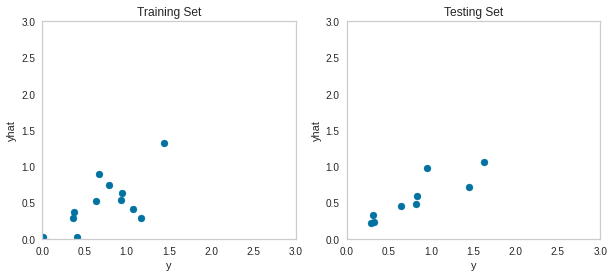

Training Metrics:
R squared: 0.582970545667854
Mean Absolute Error: 0.5014009034461974
Mean Squared Error: 0.40300939654576085
Root Mean Squared Error: 0.6348302108010935

Testing Metrics:
R squared: 0.5785241642076264
Mean Absolute Error: 0.4715011583621411
Mean Squared Error: 0.44679906090700083
Root Mean Squared Error: 0.6684302962216785


()

In [529]:
Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test)
Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test)

### Multiple Run Analysis

Train MSE median: 0.42187047716162307
Test MSE median: 0.4209429881094087

Train_R2 median: 0.5989036661316269
Test_R2 median: 0.40599184559297585


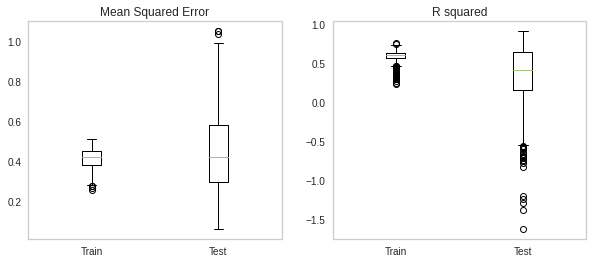

In [193]:
Multiple_Runner(LassoReg, X, y)


# Orig Data split o.5. 2

In [530]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=5)
print(X_train.shape)
print(X_test.shape)

(27, 5)
(27, 5)


In [531]:
# CV = X split
#LassoReg = LassoCV(cv = 27, random_state=1, tol =1).fit(X, y) 
LassoReg = LassoCV(cv = 37, random_state=1, tol = 0.01, n_alphas=5).fit(X, y) # CV = X split

In [532]:
LassoReg.alphas_[4]/LassoReg.alphas_[0]

0.001

In [533]:
LassoReg.score(X,y)

0.5832049683775525

In [534]:
y_pred_Train = LassoReg .predict(X_train) #Predictions on training model
y_pred_Test  = LassoReg .predict(X_test)  #Predictions on testing model

print('Intercept:',LassoReg .intercept_) #Intercept: -4.4999751446869665
print('Coefficients:', LassoReg .coef_)

Intercept: -5.703990007706598
Coefficients: [0.00000000e+00 0.00000000e+00 1.05493421e-05 0.00000000e+00
 0.00000000e+00]


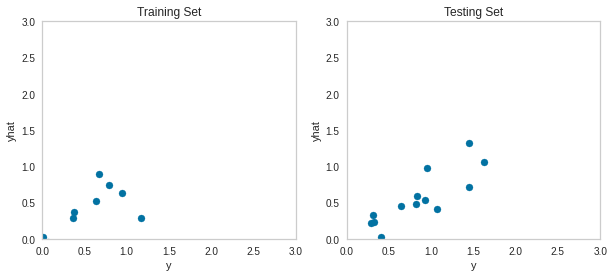

Training Metrics:
R squared: 0.6740070344377518
Mean Absolute Error: 0.4496637513753671
Mean Squared Error: 0.3140081033702132
Root Mean Squared Error: 0.5603642595403575

Testing Metrics:
R squared: 0.46262295858380487
Mean Absolute Error: 0.5343122900937327
Mean Squared Error: 0.5195819598746819
Root Mean Squared Error: 0.7208203381389027


()

In [535]:
Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test)
Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test)

Train MSE median: 0.4209071379888747
Test MSE median: 0.42546172697287094

Train_R2 median: 0.5975520775392502
Test_R2 median: 0.41914730814986667


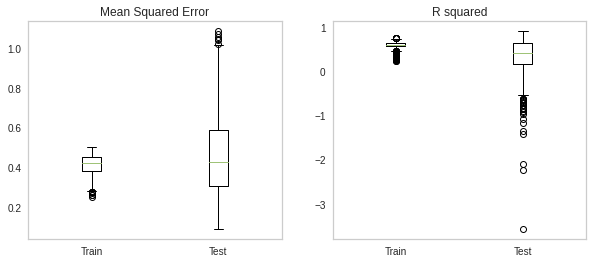

In [536]:
Multiple_Runner(LassoReg, X, y)

## Orig Data 0.3   TOL = 0.1

In [537]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)

(37, 5)
(17, 5)


In [538]:
# CV = X train split
#LassoReg = LassoCV(cv = 16, random_state=1, tol =1).fit(X, y) 
# CV = X split
#LassoReg = LassoCV(cv = 27, random_state=1, tol =1).fit(X, y) 
LassoReg = LassoCV(cv = 43, random_state=1, tol = 0.1, n_alphas=5).fit(X, y) # CV = X split
LassoReg.alphas_[4]/LassoReg.alphas_[0]

0.001

In [539]:
LassoReg.score(X,y)

0.5832049683775525

In [540]:
y_pred_Train = LassoReg .predict(X_train) #Predictions on training model
y_pred_Test  = LassoReg .predict(X_test)  #Predictions on testing model

print('Intercept:',LassoReg .intercept_) #Intercept: -4.4999751446869665
print('Coefficients:', LassoReg .coef_)

Intercept: -5.703990007706598
Coefficients: [0.00000000e+00 0.00000000e+00 1.05493421e-05 0.00000000e+00
 0.00000000e+00]


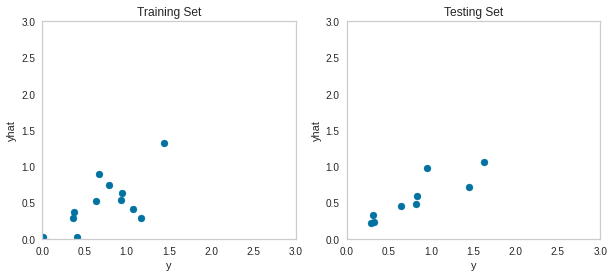

Training Metrics:
R squared: 0.582970545667854
Mean Absolute Error: 0.5014009034461974
Mean Squared Error: 0.40300939654576085
Root Mean Squared Error: 0.6348302108010935

Testing Metrics:
R squared: 0.5785241642076264
Mean Absolute Error: 0.4715011583621411
Mean Squared Error: 0.44679906090700083
Root Mean Squared Error: 0.6684302962216785


()

In [541]:
Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test)
Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test)

Train MSE median: 0.4211173200500924
Test MSE median: 0.41946282158473536

Train_R2 median: 0.5994814027192397
Test_R2 median: 0.4029357969643138


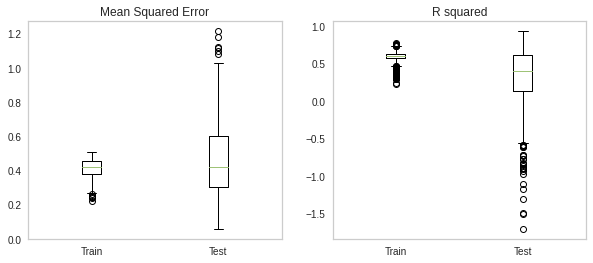

In [542]:
Multiple_Runner(LassoReg, X, y)

# Split 0.5, TOL = 0.1

In [543]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)
print(X_train.shape)
print(X_test.shape)

(27, 5)
(27, 5)


In [544]:
# CV = X train split
#LassoReg = LassoCV(cv = 37, random_state=1, tol =0.1).fit(X, y) 
LassoReg = LassoCV(cv = 43, random_state=1, tol = 0.1, n_alphas=5).fit(X, y) # CV = X split
LassoReg.alphas_[4]/LassoReg.alphas_[0]

0.001

In [545]:
LassoReg.alphas_[4]/LassoReg.alphas_[0]

0.001

In [546]:
LassoReg.score(X,y)

0.5832049683775525

In [549]:
y_pred_Train = LassoReg .predict(X_train) #Predictions on training model
y_pred_Test  = LassoReg .predict(X_test)  #Predictions on testing model

print('Intercept:',LassoReg .intercept_) #Intercept: -4.4999751446869665
print('Coefficients:', LassoReg .coef_)

Intercept: -5.703990007706598
Coefficients: [0.00000000e+00 0.00000000e+00 1.05493421e-05 0.00000000e+00
 0.00000000e+00]


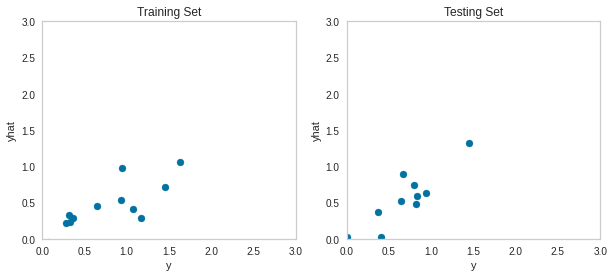

Training Metrics:
R squared: 0.4559567171095723
Mean Absolute Error: 0.5305609757154071
Mean Squared Error: 0.43544348251281956
Root Mean Squared Error: 0.659881415492829

Testing Metrics:
R squared: 0.667103120875254
Mean Absolute Error: 0.45341506575369267
Mean Squared Error: 0.39814658073207554
Root Mean Squared Error: 0.6309885741691964


()

In [550]:
Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test)
Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test)

Train MSE median: 0.41690758309426923
Test MSE median: 0.4396599358253828

Train_R2 median: 0.6000585999314818
Test_R2 median: 0.41110559736247543


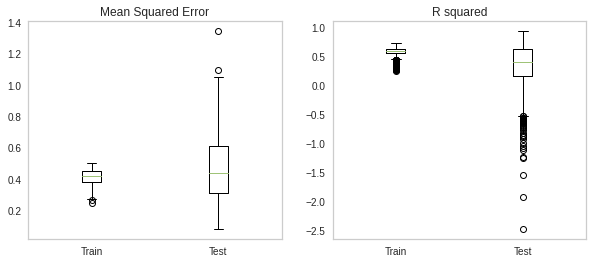

In [317]:
Multiple_Runner(LassoReg, X, y)

# Split 3% , tol = 0.1


In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)

(37, 4)
(17, 4)


In [217]:
# CV = X train split
LassoReg = LassoCV(cv = 37, random_state=1, tol =0.1).fit(X, y) 

In [218]:
LassoReg.score(X,y)

0.5832228282977924

In [219]:
y_pred_Train = LassoReg .predict(X_train) #Predictions on training model
y_pred_Test  = LassoReg .predict(X_test)  #Predictions on testing model

print('Intercept:',LassoReg .intercept_) #Intercept: -4.4999751446869665
print('Coefficients:', LassoReg .coef_)

Intercept: -5.7305110494746865
Coefficients: [0.00000000e+00 1.05983919e-05 0.00000000e+00 0.00000000e+00]


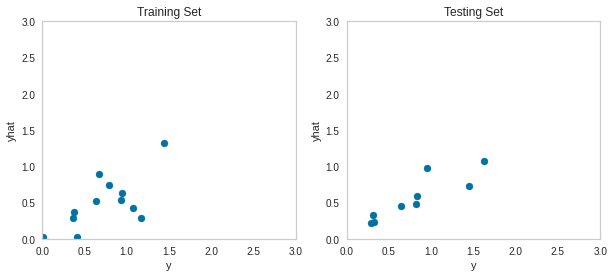

Training Metrics:
R squared: 0.5824345272126727
Mean Absolute Error: 0.5012252591617238
Mean Squared Error: 0.4035273946677542
Root Mean Squared Error: 0.6352380614130062

Testing Metrics:
R squared: 0.579641189953404
Mean Absolute Error: 0.47029195882201713
Mean Squared Error: 0.4456149217183709
Root Mean Squared Error: 0.6675439474059899


()

In [220]:
Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test)
Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test)

Train MSE median: 0.41484562618236565
Test MSE median: 0.45502248709469295

Train_R2 median: 0.6021553872206249
Test_R2 median: 0.396346631558064


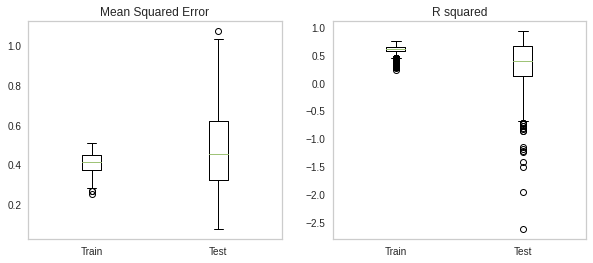

In [221]:
Multiple_Runner(LassoReg, X, y)

# ADJUSTED  

Substitute Qty split o.3  TOL o.01


In [379]:
ADJUSTED_data = pd.read_csv('/content/Porcelana_OP_adelphi_2021_SCALED.csv')
ADJUSTED_data.head(2)

,date,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,...,Preferencial_creditlag_8,loan_overdraftslag_8,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day
0,2017-01-01,1.503548,0.699923,112579.4297,11303.0,1185131.0,3587.0,7716.0,229478.0,955653.0,897063.518,913190.407,194276.020,502084.8330,171559.9665,45269.5875,0.0694,14753.34784,206242.568,5.47,2944.65,52.19,52.81,102.548972,-30.2,-28.3,-33.1,11.733267,1.044525e+11,1.323489e+11,1.727682e+11,1.050914e+11,8.847567e+10,8.354725e+10,5.008444e+10,9.372000e+10,3.037115e+10,3.136015e+10,1.585430e+11,1.050763e+12,...,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.00,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,3106784.5,386289.5525,4875376.339,4791146.877,5996088.922,3013612.505,470541.3290,1093819.181,1,5,25
1,2017-02-01,0.076213,0.316156,113438.0949,16187.0,1590979.0,4659.0,11528.0,272961.0,1318018.0,1025704.960,1007968.299,228359.839,530826.1625,199731.6950,49050.6025,0.0678,14753.34784,206242.568,5.18,2881.68,53.40,54.01,102.919033,-24.3,-19.9,-31.0,10.504292,1.574855e+11,8.351517e+10,1.096908e+11,8.252536e+10,8.582517e+10,1.522091e+11,5.056706e+10,6.034851e+10,2.138243e+10,2.216364e+10,2.104634e+11,1.036176e+12,...,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.56,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.9,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,0,4,24


In [ ]:
#Add new variable for ADJUSTED  Quantity
#This is the avg of previous Aprils

ADJUSTED_data["Quantity_adj"] = ADJUSTED_data['Quantity']
ADJUSTED_data.at[39,'Quantity_adj'] =  -1.303515
# Next drop the original Qunatity column
ADJUSTED_data.drop(columns='Quantity')

In [381]:
ADJUSTED_data['date'] = pd.to_datetime(ADJUSTED_data['date'])
ADJUSTED_data['date']= ADJUSTED_data['date'].map(dt.datetime.toordinal)

In [382]:
ADJUSTED_data = ADJUSTED_data[['date' ,'Quantity', 'Seasonal', 'Gray_cement_dispatch_comercial', 'ISE',
       'Construction_lic_area/unt_SIlag_4', ]]

In [383]:
y = data['Quantity']
X = data.loc[: ,data.columns != 'Quantity']

In [384]:
cols =data.columns.difference(['date'])

In [ ]:
#This is the avg of previous Aprils

ADJUSTED_data["Quantity_adj"] = ADJUSTED_data['Quantity']
ADJUSTED_data.at[39,'Quantity_adj'] =  -1.303515
# Next drop the original Qunatity column
ADJUSTED_data.drop(columns='Quantity')

In [386]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [387]:
ADJUSTED_data[cols] = sc.fit_transform(ADJUSTED_data[cols])

In [388]:
ADJUSTED_data.shape

(54, 7)

In [365]:
ADJUSTED_data.head()

,date,Quantity,Seasonal,Gray_cement_dispatch_comercial,ISE,Construction_lic_area/unt_SIlag_4,Quantity_adj
0,736330,1.539880,0.703768,-0.536381,-0.687592,1.924774,1.503548
1,736361,0.110421,0.325418,-0.137113,-0.608165,-0.287215,0.076213
2,736389,-1.314169,-0.250193,0.385513,-0.770505,-1.573761,-1.346258
3,736420,-2.091651,-2.371991,-0.872854,-0.594309,-0.738789,-2.122585
4,736450,-0.631964,-0.621405,-0.260166,-0.575749,0.417245,-0.665067


In [389]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)

(37, 5)
(17, 5)


In [390]:
# CV = X train split
#LassoReg = LassoCV(cv = 16, random_state=1, tol =1).fit(X, y) 
# CV = X split
#LassoReg = LassoCV(cv = 27, random_state=1, tol =1).fit(X, y) 
LassoReg = LassoCV(cv = 43, random_state=1, tol = 0.01, n_alphas=5).fit(X, y) # CV = X split
LassoReg.alphas_[4]/LassoReg.alphas_[0]

0.0010000000000000002

In [391]:
LassoReg.score(X,y)

0.7582461411245608

In [392]:
y_pred_Train = LassoReg .predict(X_train) #Predictions on training model
y_pred_Test  = LassoReg .predict(X_test)  #Predictions on testing model

print('Intercept:',LassoReg .intercept_) #Intercept: -4.4999751446869665
print('Coefficients:', LassoReg .coef_)

Intercept: 1.3185999339649957e-17
Coefficients: [0.         0.282596   0.39057196 0.34889242 0.18087969]


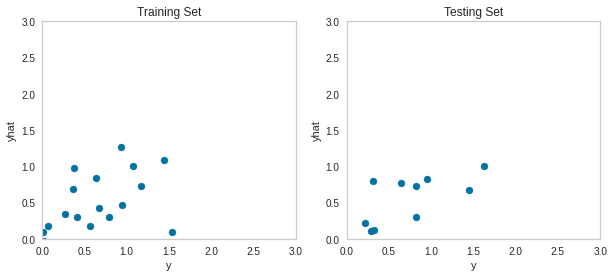

Training Metrics:
R squared: 0.7464502984253809
Mean Absolute Error: 0.39673365703999036
Mean Squared Error: 0.2450256478636175
Root Mean Squared Error: 0.4950006544072619

Testing Metrics:
R squared: 0.7786653801002192
Mean Absolute Error: 0.3882052249076201
Mean Squared Error: 0.234632906371757
Root Mean Squared Error: 0.48438920959467807


()

In [393]:
Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test)
Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test)

Train MSE median: 0.23871798063244476
Test MSE median: 0.28626181147259294

Train_R2 median: 0.7734410864368455
Test_R2 median: 0.5985520708354981


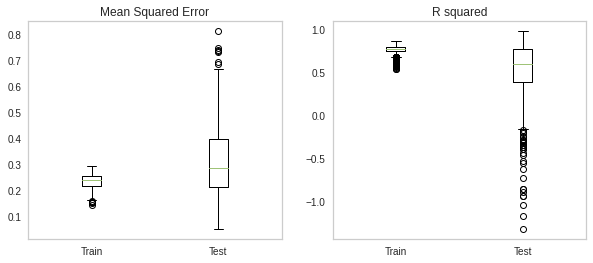

In [394]:
Multiple_Runner(LassoReg, X, y)

### adj data , split o.5 TOL 0.01

In [395]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=5)
print(X_train.shape)
print(X_test.shape)

(27, 5)
(27, 5)


In [396]:
# CV = X train split
#LassoReg = LassoCV(cv = 16, random_state=1, tol =1).fit(X, y) 
# CV = X split
#LassoReg = LassoCV(cv = 27, random_state=1, tol =1).fit(X, y) 
LassoReg = LassoCV(cv = 43, random_state=1, tol = 0.01, n_alphas=5).fit(X, y) # CV = X split
LassoReg.alphas_[4]/LassoReg.alphas_[0]

0.0010000000000000002

In [397]:
LassoReg.score(X,y)

0.7582461411245608

In [375]:
y_pred_Train = LassoReg .predict(X_train) #Predictions on training model
y_pred_Test  = LassoReg .predict(X_test)  #Predictions on testing model

print('Intercept:',LassoReg .intercept_) #Intercept: -4.4999751446869665
print('Coefficients:', LassoReg .coef_)

Intercept: 1.3185999339649957e-17
Coefficients: [0.         0.282596   0.39057196 0.34889242 0.18087969]


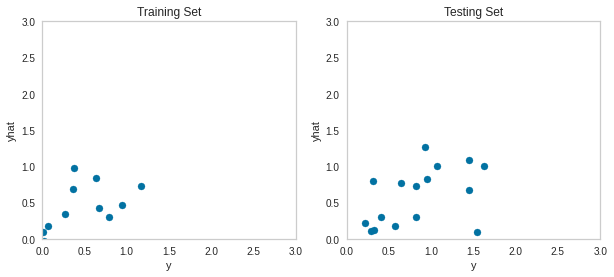

Training Metrics:
R squared: 0.7630835485995522
Mean Absolute Error: 0.4000051720745848
Mean Squared Error: 0.2282064136971399
Root Mean Squared Error: 0.47770954951428374

Testing Metrics:
R squared: 0.735954921384907
Mean Absolute Error: 0.3880923884405702
Mean Squared Error: 0.25530130405373846
Root Mean Squared Error: 0.5052734943114852


()

In [376]:
Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test)
Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test)

Train MSE median: 0.24100578264010825
Test MSE median: 0.2775406138156856

Train_R2 median: 0.772969412382023
Test_R2 median: 0.5813120813866559


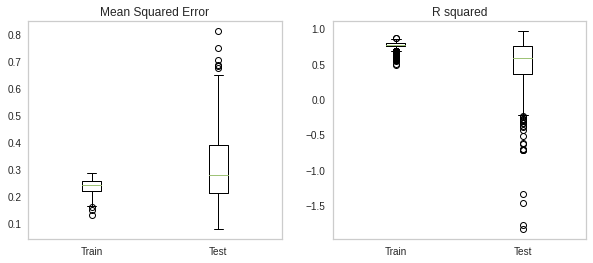

In [377]:
Multiple_Runner(LassoReg, X, y)

# Adjusted Data. Split = 0.3 | TOL 0.1

In [398]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)

(37, 5)
(17, 5)


In [399]:
# CV = X train split
#LassoReg = LassoCV(cv = 16, random_state=1, tol =1).fit(X, y) 
# CV = X split
#LassoReg = LassoCV(cv = 27, random_state=1, tol =1).fit(X, y) 
LassoReg = LassoCV(cv = 43, random_state=1, tol = 0.1, n_alphas=5).fit(X, y) # CV = X split
LassoReg.alphas_[4]/LassoReg.alphas_[0]

0.0010000000000000002

In [400]:
LassoReg.score(X,y)

0.7581881242959654

In [401]:
y_pred_Train = LassoReg .predict(X_train) #Predictions on training model
y_pred_Test  = LassoReg .predict(X_test)  #Predictions on testing model

print('Intercept:',LassoReg .intercept_) #Intercept: -4.4999751446869665
print('Coefficients:', LassoReg .coef_)

Intercept: 1.3053683323932892e-17
Coefficients: [0.         0.27845701 0.40163255 0.34616667 0.18368738]


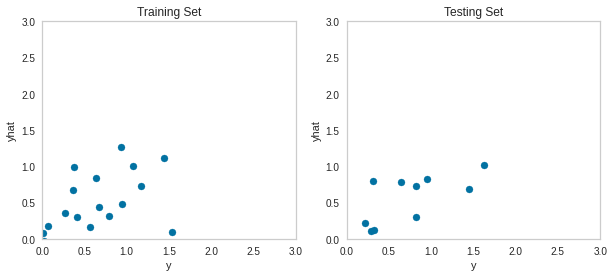

Training Metrics:
R squared: 0.7449728843294128
Mean Absolute Error: 0.3971518704536911
Mean Squared Error: 0.24645339297149685
Root Mean Squared Error: 0.49644072452962285

Testing Metrics:
R squared: 0.7814228608796672
Mean Absolute Error: 0.38639098563093727
Mean Squared Error: 0.23170974988661672
Root Mean Squared Error: 0.4813623893561032


()

In [402]:
Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test)
Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test)

Train MSE median: 0.23965398013108513
Test MSE median: 0.2850636952277938

Train_R2 median: 0.7703700194454717
Test_R2 median: 0.6055103751106454


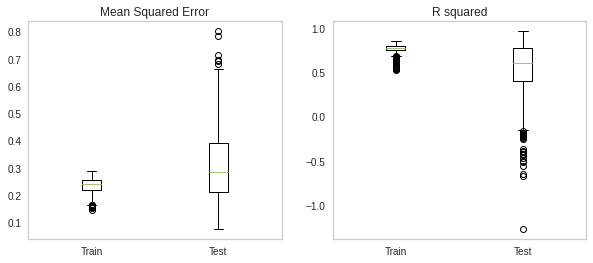

In [403]:
Multiple_Runner(LassoReg, X, y)

# Adjusted Data split 0.5 TOL 0.1

In [404]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=5)
print(X_train.shape)
print(X_test.shape)

(27, 5)
(27, 5)


In [405]:
# CV = X train split
#LassoReg = LassoCV(cv = 16, random_state=1, tol =1).fit(X, y) 
# CV = X split
#LassoReg = LassoCV(cv = 27, random_state=1, tol =1).fit(X, y) 
LassoReg = LassoCV(cv = 43, random_state=1, tol = 0.1, n_alphas=5).fit(X, y) # CV = X split
LassoReg.alphas_[4]/LassoReg.alphas_[0]

0.0010000000000000002

In [406]:
LassoReg.score(X,y)

0.7581881242959654

In [407]:
y_pred_Train = LassoReg .predict(X_train) #Predictions on training model
y_pred_Test  = LassoReg .predict(X_test)  #Predictions on testing model

print('Intercept:',LassoReg .intercept_) #Intercept: -4.4999751446869665
print('Coefficients:', LassoReg .coef_)

Intercept: 1.3053683323932892e-17
Coefficients: [0.         0.27845701 0.40163255 0.34616667 0.18368738]


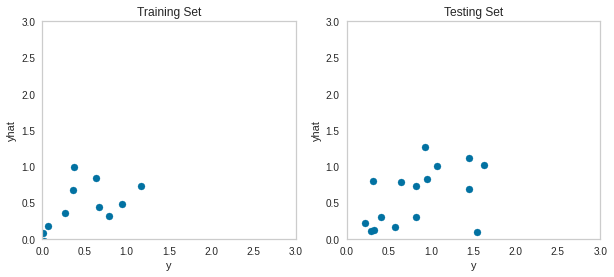

Training Metrics:
R squared: 0.7613230442544936
Mean Absolute Error: 0.4005584130646415
Mean Squared Error: 0.22990219455367894
Root Mean Squared Error: 0.47948117226193454

Testing Metrics:
R squared: 0.737588773099805
Mean Absolute Error: 0.3869699559173032
Mean Squared Error: 0.25372155685439024
Root Mean Squared Error: 0.5037078090067596


()

In [408]:
Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test)
Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test)



Train MSE median: 0.24120569623885096
Test MSE median: 0.2772288781895498

Train_R2 median: 0.7700241796702878
Test_R2 median: 0.602470180987162


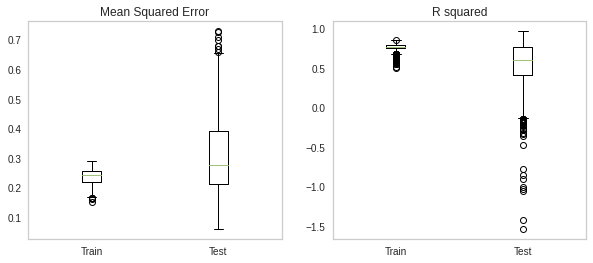

In [409]:
Multiple_Runner(LassoReg, X, y)

# AUGMENTED DATA

We drop the date column

Substitute Adjusted Qunatity. 

We multiply the dataframe a 1/10,ooo several times.

We devide by 1 / 10,ooo sevarla times

 

In [465]:
AUGMENTED_data = pd.read_csv('/content/Porcelana_OP_adelphi_2021_SCALED.csv')
AUGMENTED_data.head(2)

,date,Quantity,Seasonal,Consumer_loans,Construction_lic_unt,Construction_lic_area,Construction_lic_unt_SI,Construction_lic_unt_NO_SI,Construction_lic_area_SI,Construction_lic_area_NO_SI,Gray_cement_prod,Gray_cement_dispatch,Gray_cement_dispatch_Factory,Gray_cement_dispatch_comercial,Gray_cement_dispatch_contractor,Gray_cement_dispatch_other,DTF(interest_rate),GDP_Constr,GDP_Total,Inflation,USD_exchange,Oil-brent,Oil_WTI,ISE,ICC,IEC,ICE,Unemployment%,RADAR_Constr,RADAR_Rev,RADAR_Toilets,RADAR_HomeAppliance,RADAR_Paint,RADAR_Furniture,RADAR_Tools,RADAR_Elect,RADAR_Plumbing,RADAR_Wood,RADAR_Supply,RADAR_Remodel,...,Preferencial_creditlag_8,loan_overdraftslag_8,Credit_cardlag_8,Treasury_loanlag_8,Housing_loanlag_8,Consumer_creditlag_9,Consumer_microcreditlag_9,Ordinary_creditlag_9,Preferencial_creditlag_9,loan_overdraftslag_9,Credit_cardlag_9,Treasury_loanlag_9,Housing_loanlag_9,Consumer_creditlag_10,Consumer_microcreditlag_10,Ordinary_creditlag_10,Preferencial_creditlag_10,loan_overdraftslag_10,Credit_cardlag_10,Treasury_loanlag_10,Housing_loanlag_10,Consumer_creditlag_11,Consumer_microcreditlag_11,Ordinary_creditlag_11,Preferencial_creditlag_11,loan_overdraftslag_11,Credit_cardlag_11,Treasury_loanlag_11,Housing_loanlag_11,Consumer_creditlag_12,Consumer_microcreditlag_12,Ordinary_creditlag_12,Preferencial_creditlag_12,loan_overdraftslag_12,Credit_cardlag_12,Treasury_loanlag_12,Housing_loanlag_12,holiday,sunday,working_day
0,2017-01-01,1.503548,0.699923,112579.4297,11303.0,1185131.0,3587.0,7716.0,229478.0,955653.0,897063.518,913190.407,194276.020,502084.8330,171559.9665,45269.5875,0.0694,14753.34784,206242.568,5.47,2944.65,52.19,52.81,102.548972,-30.2,-28.3,-33.1,11.733267,1.044525e+11,1.323489e+11,1.727682e+11,1.050914e+11,8.847567e+10,8.354725e+10,5.008444e+10,9.372000e+10,3.037115e+10,3.136015e+10,1.585430e+11,1.050763e+12,...,4445890.861,6402426.269,3390803.016,550883.0739,1302564.560,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.00,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.900,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,3106784.5,386289.5525,4875376.339,4791146.877,5996088.922,3013612.505,470541.3290,1093819.181,1,5,25
1,2017-02-01,0.076213,0.316156,113438.0949,16187.0,1590979.0,4659.0,11528.0,272961.0,1318018.0,1025704.960,1007968.299,228359.839,530826.1625,199731.6950,49050.6025,0.0678,14753.34784,206242.568,5.18,2881.68,53.40,54.01,102.919033,-24.3,-19.9,-31.0,10.504292,1.574855e+11,8.351517e+10,1.096908e+11,8.252536e+10,8.582517e+10,1.522091e+11,5.056706e+10,6.034851e+10,2.138243e+10,2.216364e+10,2.104634e+11,1.036176e+12,...,6566090.070,7930536.312,4347164.930,677598.1836,1864166.572,4353892.017,433679.7772,5854575.608,4445890.861,6402426.269,3390803.016,550883.0739,1302564.56,4680431.000,460632.0000,5702443.000,4657354.000,7012296.000,3283417.000,549789.0000,1454672.000,4941981.754,531850.1926,7315235.649,6120086.089,8140200.383,3814229.013,632387.5921,1627959.289,4068020.9,438682.2679,6513619.182,6137144.374,6675101.294,2989980.729,483448.3473,1298811.962,0,4,24


In [466]:
 AUGMENTED_data = AUGMENTED_data[['Quantity', 'Seasonal', 'Gray_cement_dispatch_comercial', 'ISE',
       'Construction_lic_area/unt_SIlag_4', ]]

In [ ]:
#Add new variable for ADJUSTED  Quantity
#This is the avg of previous Aprils

AUGMENTED_data["Quantity_adj"] = AUGMENTED_data['Quantity']
AUGMENTED_data.at[39,'Quantity_adj'] =  -1.303515
# Next drop the original Qunatity column
AUGMENTED_data.drop(columns='Quantity')

In [468]:
AUGMENTED_data.shape

(54, 6)

## Augment the code Here

In [469]:
one = AUGMENTED_data*1.0001

Multiply the contents and save as a new df and stack them

In [470]:
frames = [one, AUGMENTED_data]
concated_data = pd.concat(frames)
concated_data.shape

(108, 6)

In [471]:
two = concated_data* 1.0001

In [472]:
frames = [two, concated_data]
concated_data = pd.concat(frames)
concated_data.shape

(216, 6)

In [473]:
three = concated_data * 1.001

In [474]:
frames = [three, concated_data]
concated_data = pd.concat(frames)
concated_data.shape

(432, 6)

In [475]:
four = concated_data* 0.99999

In [476]:
frames = [four, concated_data]
concated_data = pd.concat(frames)
concated_data.shape

(864, 6)

In [477]:
five = concated_data * 0.999999

In [478]:
frames = [five, concated_data]
concated_data = pd.concat(frames)
concated_data.shape

(1728, 6)

In [479]:
six = concated_data * 0.999999

In [480]:
frames = [six, concated_data]
concated_data = pd.concat(frames)
concated_data.shape

(3456, 6)

In [481]:
AUGMENTED_data = concated_data

In [482]:
y = AUGMENTED_data['Quantity_adj']
X = AUGMENTED_data.loc[: ,AUGMENTED_data.columns != 'Quantity_adj']

In [483]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


In [484]:
AUGMENTED_data[cols] = sc.fit_transform(AUGMENTED_data[cols])

In [485]:
AUGMENTED_data.shape

(3456, 6)

In [486]:
y = AUGMENTED_data['Quantity_adj']
X = AUGMENTED_data.loc[: ,AUGMENTED_data.columns != 'Quantity_adj']

In [487]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
print(X_train.shape)
print(X_test.shape)

(2419, 5)
(1037, 5)


In [488]:
# CV = X train split
#LassoReg = LassoCV(cv = 16, random_state=1, tol =1).fit(X, y) 
# CV = X split
#LassoReg = LassoCV(cv = 27, random_state=1, tol =1).fit(X, y) 
LassoReg = LassoCV(cv = 43, random_state=1, tol = 0.01, n_alphas=5).fit(X, y) # CV = X split
LassoReg.alphas_[4]/LassoReg.alphas_[0]

0.0009999999999999998

In [489]:
LassoReg.score(X,y)

0.8849692629366414

In [490]:
y_pred_Train = LassoReg .predict(X_train) #Predictions on training model
y_pred_Test  = LassoReg .predict(X_test)  #Predictions on testing model

print('Intercept:',LassoReg .intercept_) #Intercept: -4.4999751446869665
print('Coefficients:', LassoReg .coef_)

Intercept: 0.01983065524480546
Coefficients: [ 0.99075884 -0.02111236 -0.18639906 -0.08639709 -0.01539287]


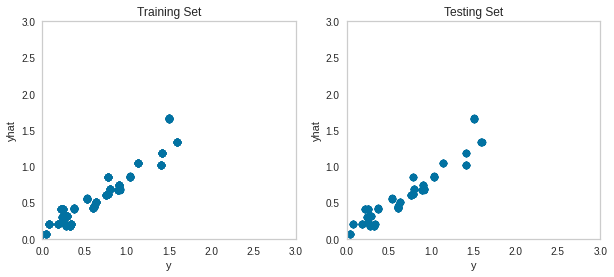

Training Metrics:
R squared: 0.8818738395051711
Mean Absolute Error: 0.17949292343926113
Mean Squared Error: 0.08319797504236319
Root Mean Squared Error: 0.2884405918770158

Testing Metrics:
R squared: 0.8922856557531198
Mean Absolute Error: 0.17540152676643916
Mean Squared Error: 0.07487193910330474
Root Mean Squared Error: 0.27362737272302406


()

In [491]:
Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test)
Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test)

Train MSE median: 0.08081120794911406
Test MSE median: 0.0804480852818748

Train_R2 median: 0.8849204501364631
Test_R2 median: 0.8848293194093434


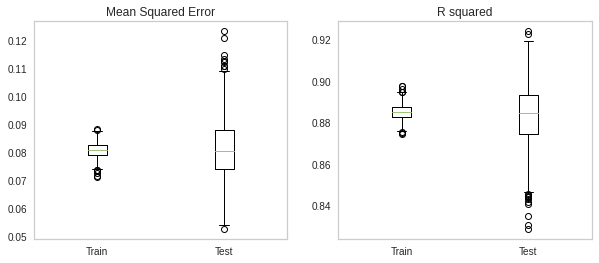

In [494]:
Multiple_Runner(LassoReg, X, y)

Augemented Split 0.5, TOL 0.01

In [495]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=5)
print(X_train.shape)
print(X_test.shape)

(1728, 5)
(1728, 5)


In [496]:
1# CV = X train split
2 #LassoReg = LassoCV(cv = 16, random_state=1, tol =1).fit(X, y)
3 # CV = X split
4 #LassoReg = LassoCV(cv = 27, random_state=1, tol =1).fit(X, y)
LassoReg = LassoCV(cv = 43, random_state=1, tol = 0.01, n_alphas=5).fit(X, y) # CV = X 6 LassoReg.alphas_[4]/LassoReg.alphas_[0]

In [497]:
LassoReg.score(X,y)

0.8849692629366414

In [498]:
y_pred_Train = LassoReg .predict(X_train) #Predictions on training model
y_pred_Test = LassoReg .predict(X_test) #Predictions on testing model

print('Intercept:',LassoReg .intercept_) #Intercept: -4.4999751446869665
print('Coefficients:', LassoReg .coef_)

Intercept: 0.01983065524480546
Coefficients: [ 0.99075884 -0.02111236 -0.18639906 -0.08639709 -0.01539287]


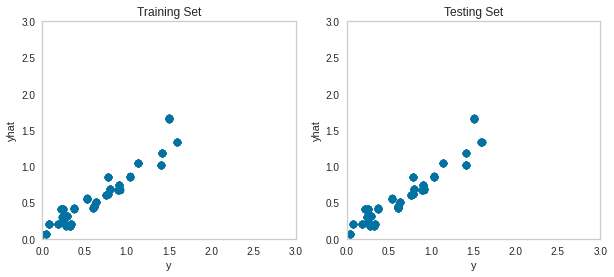

Training Metrics:
R squared: 0.8861611467037211
Mean Absolute Error: 0.17749031498005458
Mean Squared Error: 0.08114276679011857
Root Mean Squared Error: 0.28485569467735516

Testing Metrics:
R squared: 0.8836539054933705
Mean Absolute Error: 0.1790402203534929
Mean Squared Error: 0.0802565980696057
Root Mean Squared Error: 0.2832959549121831


()

In [499]:
Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test)
Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test)

Train MSE median: 0.08066703718838082
Test MSE median: 0.08097257867670207

Train_R2 median: 0.884913319672718
Test_R2 median: 0.8848487950775938


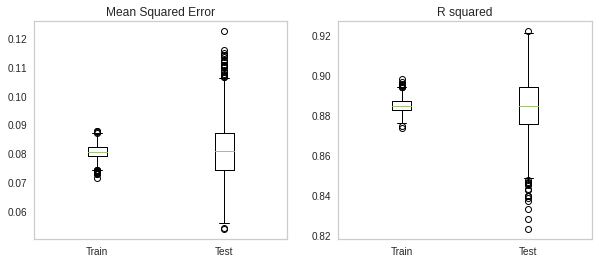

In [500]:
Multiple_Runner(LassoReg, X, y)

# AUGMENTED SPLIT 0.3 TOL = 0.1

In [506]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=5)
print(X_train.shape)
print(X_test.shape)

(1728, 5)
(1728, 5)


In [507]:
1# CV = X train split
2 #LassoReg = LassoCV(cv = 16, random_state=1, tol =1).fit(X, y)
3 # CV = X split
4 #LassoReg = LassoCV(cv = 27, random_state=1, tol =1).fit(X, y)
LassoReg = LassoCV(cv = 43, random_state=1, tol = 0.1, n_alphas=5).fit(X, y) # CV = X 6 LassoReg.alphas_[4]/LassoReg.alphas_[0]
LassoReg.alphas_[4]/LassoReg.alphas_[0]

0.0009999999999999998

In [508]:
LassoReg.score(X,y)

0.8749085953591866

In [509]:
y_pred_Train = LassoReg .predict(X_train) #Predictions on training model
y_pred_Test = LassoReg .predict(X_test) #Predictions on testing model

print('Intercept:',LassoReg .intercept_) #Intercept: -4.4999751446869665
print('Coefficients:', LassoReg .coef_)

Intercept: 0.019830655244805536
Coefficients: [ 0.8360266  -0.00150868 -0.13376399 -0.02077738  0.01678898]


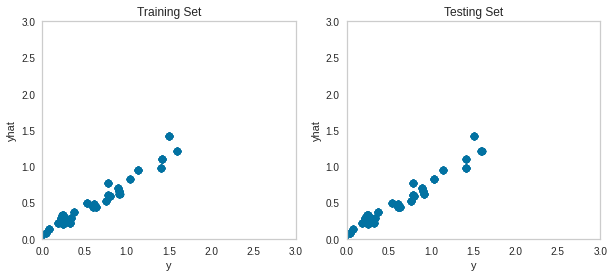

Training Metrics:
R squared: 0.8760339033136277
Mean Absolute Error: 0.1990400723219168
Mean Squared Error: 0.08836132640166362
Root Mean Squared Error: 0.29725633113806615

Testing Metrics:
R squared: 0.8736547044998164
Mean Absolute Error: 0.1998054970710637
Mean Squared Error: 0.08715413819383516
Root Mean Squared Error: 0.295218797155322


()

In [510]:

Prediction_Plots(y_train, y_pred_Train, y_test, y_pred_Test)
Metrics_Printer(y_train, y_pred_Train, y_test, y_pred_Test)

Train MSE median: 0.08776224139853918
Test MSE median: 0.08818199758645774

Train_R2 median: 0.8748706993012618
Test_R2 median: 0.874467324242955


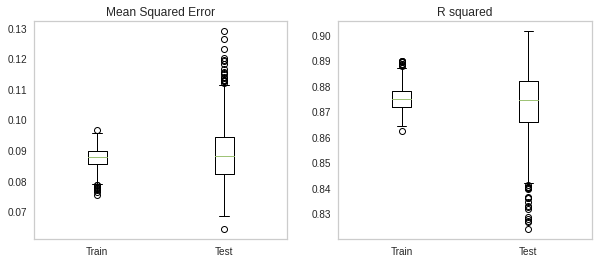

In [511]:
Multiple_Runner(LassoReg, X, y)

# SLIDES

In [572]:
# Paired box plot . Each of 6 features original v augmented
#give the orig selected data column called name
# do same for Augmented 
#then concatenate tehm vertically
ADJUSTED_data.head(2)


,date,Quantity,Seasonal,Gray_cement_dispatch_comercial,ISE,Construction_lic_area/unt_SIlag_4,Quantity_adj
0,736330,1.539880,0.703768,-0.536381,-0.687592,1.924774,1.503548
1,736361,0.110421,0.325418,-0.137113,-0.608165,-0.287215,0.076213


In [576]:
BoxPlotAdjustData = ADJUSTED_data

In [577]:
BoxPlotAdjustData.head(3)

,date,Quantity,Seasonal,Gray_cement_dispatch_comercial,ISE,Construction_lic_area/unt_SIlag_4,Quantity_adj
0,736330,1.539880,0.703768,-0.536381,-0.687592,1.924774,1.503548
1,736361,0.110421,0.325418,-0.137113,-0.608165,-0.287215,0.076213
2,736389,-1.314169,-0.250193,0.385513,-0.770505,-1.573761,-1.346258


In [578]:
BoxPlotAdjustData = BoxPlotAdjustData.drop(columns='date')
BoxPlotAdjustData.head(2)

,Quantity,Seasonal,Gray_cement_dispatch_comercial,ISE,Construction_lic_area/unt_SIlag_4,Quantity_adj
0,1.539880,0.703768,-0.536381,-0.687592,1.924774,1.503548
1,0.110421,0.325418,-0.137113,-0.608165,-0.287215,0.076213


In [579]:
BoxPlotAdjustData = BoxPlotAdjustData.drop(columns='Quantity')
BoxPlotAdjustData.head(2)

,Seasonal,Gray_cement_dispatch_comercial,ISE,Construction_lic_area/unt_SIlag_4,Quantity_adj
0,0.703768,-0.536381,-0.687592,1.924774,1.503548
1,0.325418,-0.137113,-0.608165,-0.287215,0.076213


In [580]:
# add new column called Name and fill it with Adjusted
BoxPlotAdjustData.loc[: , 'Name'] = 'Adjusted'


In [581]:
BoxPlotAdjustData.head(3)

,Seasonal,Gray_cement_dispatch_comercial,ISE,Construction_lic_area/unt_SIlag_4,Quantity_adj,Name
0,0.703768,-0.536381,-0.687592,1.924774,1.503548,Adjusted
1,0.325418,-0.137113,-0.608165,-0.287215,0.076213,Adjusted
2,-0.250193,0.385513,-0.770505,-1.573761,-1.346258,Adjusted


In [612]:
BoxPlotAdjustData_skinny = BoxPlotAdjustData.reset_index()
pd.melt(BoxPlotAdjustData_skinny,id_vars='Name', value_vars=['Seasonal', 'Gray_cement_dispatch_comercial' , 'ISE' ,
                                                          	'Construction_lic_area/unt_SIlag_4' ,'Quantity_adj',
                                                          ])

,Name,variable,value
0,Adjusted,Seasonal,0.703768
1,Adjusted,Seasonal,0.325418
2,Adjusted,Seasonal,-0.250193
3,Adjusted,Seasonal,-2.371991
4,Adjusted,Seasonal,-0.621405
...,...,...,...
265,Adjusted,Quantity_adj,0.903134
266,Adjusted,Quantity_adj,1.407546
267,Adjusted,Quantity_adj,0.798410
268,Adjusted,Quantity_adj,-0.502894


In [625]:
BoxPlotAdjustData_skinny2 = BoxPlotAdjustData_skinny.drop(columns="Name")

In [626]:
BoxPlotAdjustData_skinny2.head()

,index,Seasonal,Gray_cement_dispatch_comercial,ISE,Construction_lic_area/unt_SIlag_4,Quantity_adj
0,0,0.703768,-0.536381,-0.687592,1.924774,1.503548
1,1,0.325418,-0.137113,-0.608165,-0.287215,0.076213
2,2,-0.250193,0.385513,-0.770505,-1.573761,-1.346258
3,3,-2.371991,-0.872854,-0.594309,-0.738789,-2.122585
4,4,-0.621405,-0.260166,-0.575749,0.417245,-0.665067


In [623]:
ax = sns.boxplot(x=BoxPlotAdjustData_skinny["Seasonal"], y=BoxPlotAdjustData_skinny["variable"],color="yellow")



KeyError: ignored

In [585]:
AUGMENTED_data.head(2)

,Quantity,Seasonal,Gray_cement_dispatch_comercial,ISE,Construction_lic_area/unt_SIlag_4,Quantity_adj,Name
0,1.540774,0.704178,-0.532235,-0.674478,1.936743,1.505335,Augmented
1,0.110466,0.325603,-0.132734,-0.595009,-0.276464,0.076304,Augmented


In [583]:
BoxPlotAUGMENTEDdata = AUGMENTED_data

In [586]:
BoxPlotAUGMENTEDdata = BoxPlotAUGMENTEDdata.drop(columns='Quantity')
BoxPlotAUGMENTEDdata.head(2)

,Seasonal,Gray_cement_dispatch_comercial,ISE,Construction_lic_area/unt_SIlag_4,Quantity_adj,Name
0,0.704178,-0.532235,-0.674478,1.936743,1.505335,Augmented
1,0.325603,-0.132734,-0.595009,-0.276464,0.076304,Augmented


In [566]:
# add new column called Name and fill it with Adjusted
#BoxPlotAUGMENTEDdata.loc[: , 'Name'] = 'Augmented'

In [587]:
# Stack the two data frames
frames = [BoxPlotAUGMENTEDdata , BoxPlotAdjustData]
concated_boxes = pd.concat(frames) 


In [588]:
concated_boxes.head(3)

,Seasonal,Gray_cement_dispatch_comercial,ISE,Construction_lic_area/unt_SIlag_4,Quantity_adj,Name
0,0.704178,-0.532235,-0.674478,1.936743,1.505335,Augmented
1,0.325603,-0.132734,-0.595009,-0.276464,0.076304,Augmented
2,-0.250349,0.390199,-0.757434,-1.563719,-1.347858,Augmented


In [589]:
concated_boxes.tail(3)

,Seasonal,Gray_cement_dispatch_comercial,ISE,Construction_lic_area/unt_SIlag_4,Quantity_adj,Name
51,-2.371991,0.775629,0.814804,-0.181779,0.798410,Adjusted
52,-0.621405,-1.370725,-0.442503,0.553221,-0.502894,Adjusted
53,-0.911472,0.947438,1.204245,0.798963,1.416107,Adjusted


In [602]:
concated_boxes_skinny = concated_boxes.reset_index()
pd.melt(concated_boxes_skinny,id_vars='Name', value_vars=['Seasonal', 'Gray_cement_dispatch_comercial' , 'ISE' ,
                                                          	'Construction_lic_area/unt_SIlag_4' ,'Quantity_adj',
                                                          ])

,Name,variable,value
0,Augmented,Seasonal,0.704178
1,Augmented,Seasonal,0.325603
2,Augmented,Seasonal,-0.250349
3,Augmented,Seasonal,-2.373407
4,Augmented,Seasonal,-0.621782
...,...,...,...
17545,Adjusted,Quantity_adj,0.903134
17546,Adjusted,Quantity_adj,1.407546
17547,Adjusted,Quantity_adj,0.798410
17548,Adjusted,Quantity_adj,-0.502894


In [ ]:
ax = sns.boxplot(x= )

In [ ]:
sns.boxplot(x= )

In [596]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from random import randint, gauss

In [597]:
# create a DataFrame
df = pd.DataFrame({
    'Sensations':[randint(1,3) for i in range(300)]
})
df['Temperature'] = df['Sensations'].map(lambda x: gauss(0.8/x,0.1)*40)
df['Sensations'] = df['Sensations'].map({1:'hot',2:'normal',3:'cold'})


In [599]:
df.head(3)

,Sensations,Temperature
0,cold,9.117747
1,cold,6.748845
2,normal,20.175145


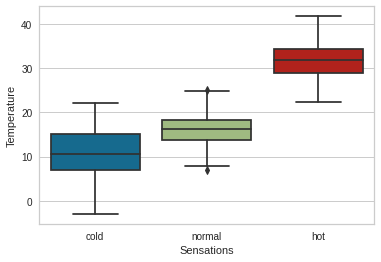

In [600]:
# create plot
ax = sns.boxplot(x="Sensations", y="Temperature", data=df)

# show plot
plt.show()


In [594]:
ax = sns.boxplot(x= 'variable' , y = 'value' , data = concated_boxes_skinny)
# show plot
plt.show()


ValueError: ignored

In [ ]:
ax = sns.boxplot(x="Location", y="value", hue="Letter", data=mdf)    
plt.show()

In [ ]:
ax = sns.boxplot(x="Name", y="value", hue="Letter", data=mdf)    
plt.show()

In [492]:
########################

In [ ]:
# TOL tells LAsso when to stop searching for some min 
# value .  

# Teh default is 1 / 10,ooo.
# Ours ran on any # greater thna tha
#tols = [0.0001 #, 0.001, 0.01, 0.1, 1]
#LassoReg = LassoCV(alphas = 0.1,cv = 54, random_state=1, tol =1).fit(X, y)

In [ ]:
# Alpha scores
# https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_linear_model_cv.html
'''
import numpy as np
from matplotlib import pyplot as plt

alphas = np.logspace(-3, -1, 30)

plt.figure(figsize=(5, 3))

for Model in [Lasso]:
    scores = [cross_val_score(Model(alpha), X, y, cv=3).mean()
            for alpha in alphas]
    plt.plot(alphas, scores, label=Model.__name__)

plt.legend(loc='lower left')
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.tight_layout()
plt.show()